# Human Activity Recognition

## Tổng hợp và load dữ liệu

In [41]:
import os

path = '/content/drive/MyDrive/data/HumanAction'

files = os.listdir(path)

human_activity = {}
for file in files:
    human_activity[file] = []

for file in files:
    child_files = os.listdir(path+'/'+file)
    groups = []

    for child_file in child_files:
        is_existed = False
        for group in groups:
            if child_file.split('_')[1].split('.')[0] == group:
                is_existed = True

        if is_existed == False:
            groups.append(child_file.split('_')[1].split('.')[0])


    for group in groups:
        files_of_group = []
        for child_file in child_files:
            if child_file.split('_')[1].split('.')[0] == group:
                files_of_group.append(path + '/' + file + '/' + child_file)
        human_activity[file].append(files_of_group)

print(human_activity)
print('STANDING: ' + str(len(human_activity['STANDING'])))
print('WALKING: ' + str(len(human_activity['WALKING'])))
print('SITTING: ' + str(len(human_activity['SITTING'])))
print('LYING: ' + str(len(human_activity['LYING'])))

{'WALKING': [['/content/drive/MyDrive/data/HumanAction/WALKING/accelXSignals_1710053612571.csv', '/content/drive/MyDrive/data/HumanAction/WALKING/accelZSignals_1710053612571.csv', '/content/drive/MyDrive/data/HumanAction/WALKING/gyroYSignals_1710053612571.csv', '/content/drive/MyDrive/data/HumanAction/WALKING/gyroZSignals_1710053612571.csv', '/content/drive/MyDrive/data/HumanAction/WALKING/gyroXSignals_1710053612571.csv', '/content/drive/MyDrive/data/HumanAction/WALKING/accelYSignals_1710053612571.csv'], ['/content/drive/MyDrive/data/HumanAction/WALKING/accelYSignals_1710053291441.csv', '/content/drive/MyDrive/data/HumanAction/WALKING/gyroZSignals_1710053291441.csv', '/content/drive/MyDrive/data/HumanAction/WALKING/gyroYSignals_1710053291441.csv', '/content/drive/MyDrive/data/HumanAction/WALKING/accelXSignals_1710053291441.csv', '/content/drive/MyDrive/data/HumanAction/WALKING/gyroXSignals_1710053291441.csv', '/content/drive/MyDrive/data/HumanAction/WALKING/accelZSignals_1710053291441.

## Một số đồ thị biểu diễn tập tín hiệu đã đo được với các hành động cơ bản của con người

### Tín hiệu trong miền thời gian với hành động đi bộ

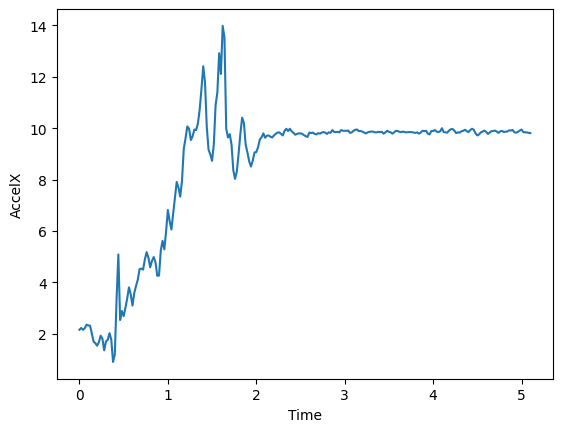

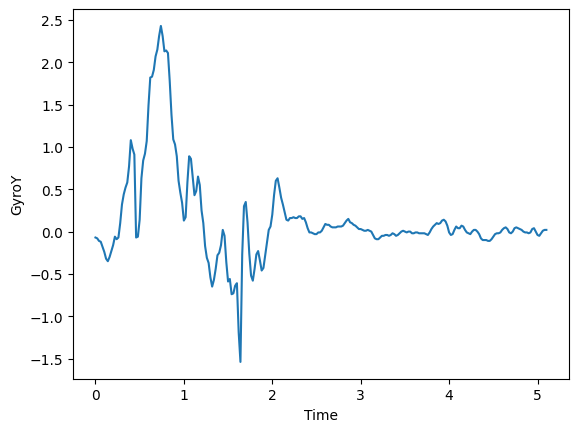

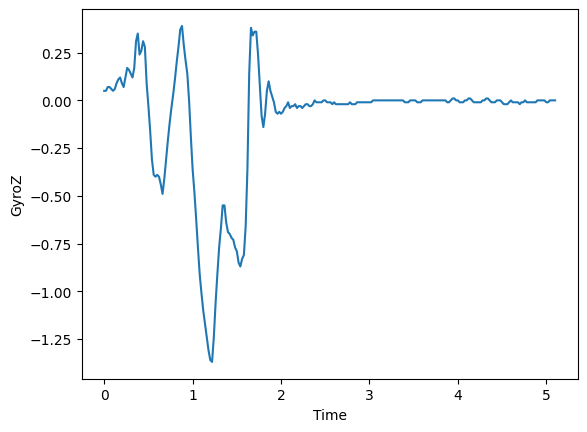

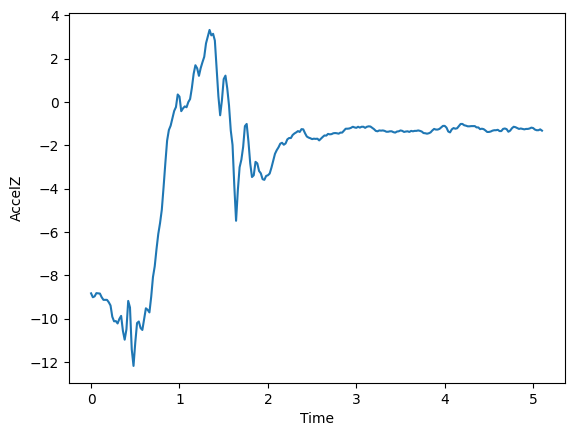

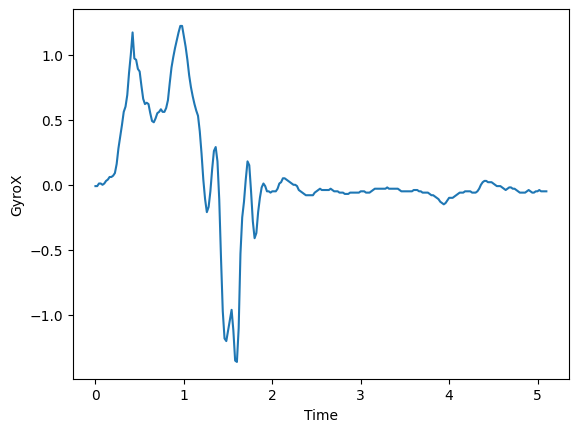

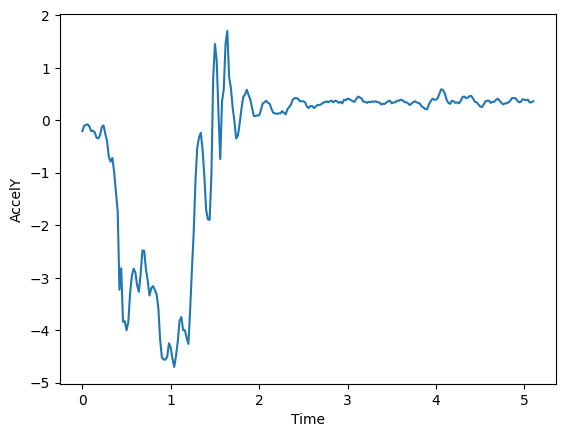

In [42]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def read_csv(path):
    with open(path, "r") as csvfile:
        reader = csv.reader(csvfile, delimiter=",")
        for row in reader:
            return list(map(float, row.copy()[:len(row)-1]))

fs = 50
x = np.arange(0, 5.12, 1/fs)

for path in human_activity['LYING'][0]:
    Y = read_csv(path)[0:256]
    signal_type = path.split('/')[-1].split('_')[0]

    # Vẽ biểu đồ
    plt.plot(x, Y)

    plt.xlabel('Time')

    if (signal_type == 'accelXSignals'):
        plt.ylabel('AccelX')
    elif (signal_type == 'accelYSignals'):
        plt.ylabel('AccelY')
    elif (signal_type == 'accelZSignals'):
        plt.ylabel('AccelZ')
    elif (signal_type == 'gyroXSignals'):
        plt.ylabel('GyroX')
    elif (signal_type == 'gyroYSignals'):
        plt.ylabel('GyroY')
    else:
        plt.ylabel('GyroZ')

    # Hiển thị biểu đồ
    plt.show()

## Tiền xử lý dữ liệu

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_train = {
    'tAcc-mean()-X': [],
    'tAcc-mean()-Y': [],
    'tAcc-mean()-Z': [],
    'tGyro-mean()-X': [],
    'tGyro-mean()-Y': [],
    'tGyro-mean()-Z': [],
    'tAcc-std()-X': [],
    'tAcc-std()-Y': [],
    'tAcc-std()-Z': [],
    'tGyro-std()-X': [],
    'tGyro-std()-Y': [],
    'tGyro-std()-Z': [],
    'tAcc-min()-X': [],
    'tAcc-min()-Y': [],
    'tAcc-min()-Z': [],
    'tGyro-min()-X': [],
    'tGyro-min()-Y': [],
    'tGyro-min()-Z': [],
    'tAcc-max()-X': [],
    'tAcc-max()-Y': [],
    'tAcc-max()-Z': [],
    'tGyro-max()-X': [],
    'tGyro-max()-Y': [],
    'tGyro-max()-Z': [],
    'activity': [],
    'label': []
}

labels = {
    'WALKING': 0,
    'STANDING': 1,
    'SITTING': 2,
    'LYING': 3
}

for human_activity_key in human_activity:
    for path_arr in human_activity[human_activity_key]:
        for path in path_arr:
            signal_type = path.split('/')[-1].split('_')[0]

            Y = read_csv(path)[:256]

            mean = round(np.mean(Y), 8)
            std = round(np.std(Y), 8)
            min = round(np.min(Y), 8)
            max = round(np.max(Y), 8)

            if (signal_type == 'accelXSignals'):
                data_train['tAcc-mean()-X'].append(mean)
                data_train['tAcc-std()-X'].append(std)
                data_train['tAcc-min()-X'].append(min)
                data_train['tAcc-max()-X'].append(max)
            elif (signal_type == 'accelYSignals'):
                data_train['tAcc-mean()-Y'].append(mean)
                data_train['tAcc-std()-Y'].append(std)
                data_train['tAcc-min()-Y'].append(min)
                data_train['tAcc-max()-Y'].append(max)
            elif (signal_type == 'accelZSignals'):
                data_train['tAcc-mean()-Z'].append(mean)
                data_train['tAcc-std()-Z'].append(std)
                data_train['tAcc-min()-Z'].append(min)
                data_train['tAcc-max()-Z'].append(max)
            elif (signal_type == 'gyroXSignals'):
                data_train['tGyro-mean()-X'].append(mean)
                data_train['tGyro-std()-X'].append(std)
                data_train['tGyro-min()-X'].append(min)
                data_train['tGyro-max()-X'].append(max)
            elif (signal_type == 'gyroYSignals'):
                data_train['tGyro-mean()-Y'].append(mean)
                data_train['tGyro-std()-Y'].append(std)
                data_train['tGyro-min()-Y'].append(min)
                data_train['tGyro-max()-Y'].append(max)
            else:
                data_train['tGyro-mean()-Z'].append(mean)
                data_train['tGyro-std()-Z'].append(std)
                data_train['tGyro-min()-Z'].append(min)
                data_train['tGyro-max()-Z'].append(max)

        data_train['activity'].append(human_activity_key)
        data_train['label'].append(labels[human_activity_key])


df = pd.DataFrame(data_train)
df.to_excel('/content/drive/MyDrive/Colab Notebooks/human_activity_data.xlsx', index=False)

## Huấn luyện và đánh giá mô hình

In [43]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import classification_report , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#chỉnh đường dẫn file vào đây nhé
path = "/content/drive/MyDrive/Colab Notebooks/human_activity_data.xlsx"
df = pd.read_excel(path)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tAcc-mean()-X   445 non-null    float64
 1   tAcc-mean()-Y   445 non-null    float64
 2   tAcc-mean()-Z   445 non-null    float64
 3   tGyro-mean()-X  445 non-null    float64
 4   tGyro-mean()-Y  445 non-null    float64
 5   tGyro-mean()-Z  445 non-null    float64
 6   tAcc-std()-X    445 non-null    float64
 7   tAcc-std()-Y    445 non-null    float64
 8   tAcc-std()-Z    445 non-null    float64
 9   tGyro-std()-X   445 non-null    float64
 10  tGyro-std()-Y   445 non-null    float64
 11  tGyro-std()-Z   445 non-null    float64
 12  tAcc-min()-X    445 non-null    float64
 13  tAcc-min()-Y    445 non-null    float64
 14  tAcc-min()-Z    445 non-null    float64
 15  tGyro-min()-X   445 non-null    float64
 16  tGyro-min()-Y   445 non-null    float64
 17  tGyro-min()-Z   445 non-null    flo

In [45]:
df_X = df.iloc[:, :-2]
df_y = df.iloc[:, -1]

X = df_X.values
y = df_y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(356, 24)
(356,)
(89, 24)
(89,)


In [46]:
# khởi tạo model và sẽ lựa chọn tham số tối ưu nhất cho model của mình
svc = SVC(kernel='rbf', class_weight='balanced')
param_grid = {'C': [1, 5, 10, 50 , 60],
              'gamma': [0.0001, 0.0005, 0.001, 0.005 ,0.003]}
grid = GridSearchCV(svc, param_grid)
grid.fit(X_train, y_train)
model = grid.best_estimator_

print(grid.best_params_)

{'C': 50, 'gamma': 0.005}


In [47]:
#dự đoán và đánh giá model
y_fit = model.predict(X_test)

#Đánh giá model thông các chỉ số precision, recall, F1-score và support nhé mỗi tham số sẽ biểu thị độ chính xác model ở một khía cạnh khác nhau
labels = ["WALKING", "STANDING", "SITTING", "LYING"]
print(classification_report(y_test, y_fit,target_names=labels))


              precision    recall  f1-score   support

     WALKING       1.00      0.91      0.95        23
    STANDING       0.85      1.00      0.92        11
     SITTING       0.86      0.86      0.86        14
       LYING       0.95      0.95      0.95        41

    accuracy                           0.93        89
   macro avg       0.91      0.93      0.92        89
weighted avg       0.94      0.93      0.93        89



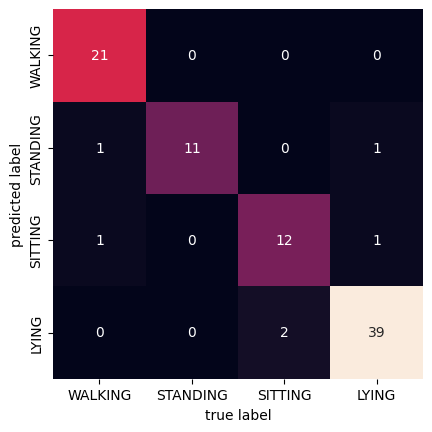

In [48]:
#đánh giá model bằng heat map
mat = confusion_matrix(y_test, y_fit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label');



## Chuyển đổi model bằng cách sử dụng micromlgen

In [49]:
!pip install micromlgen
from micromlgen import port

classMap = {
    0: 'WALKING',
    1: 'STANDING',
    2: 'SITTING',
    3: 'LYING'
}

c_code = port(model,classmap=classMap) #convert our model

#Let's write it into a .h file
modelFile = open("/content/drive/MyDrive/Colab Notebooks/human_activity_recognition_model.h", "w")
modelFile.write(c_code)
modelFile.close()

#Let's print the size of the .h file
import os
model_h_size = os.path.getsize("/content/drive/MyDrive/Colab Notebooks/human_activity_recognition_model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

  Preparing metadata (setup.py) ... done
  Created wheel for micromlgen: filename=micromlgen-1.1.28-py3-none-any.whl size=32152 sha256=9cb762aa2366724ac12fea13ca410f22f5faf2e7b9676723f04ec110bbf02191
  Stored in directory: /root/.cache/pip/wheels/97/54/64/5d82c310920abe1be0d120313ceb9e12c88f5701f53f6ed248
Successfully built micromlgen
Header file, model.h, is 57,252 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.
